In [ ]:
#这个文件可视化当输出分别为441,25,16,9,4的样子
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x

# !pip install numpy==1.16.1

TensorFlow 1.x selected.


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Aug 15 10:05:37 2020

@author: xiaoc
"""

class Solution:
    def countPrimes(self, n: int) -> int:
        if n<3: return 0
        Prime = [True] * (n + 1)
        Prime[0], Prime[1] = False ,False 
        count = 0
        for i in range(2,n):
            if not Prime[i]: continue #如果不是质数，跳到下一个数查询
            count+=1 #如果是质数，count+1
            for j in range(i*2,n,i):
                #从当前数的2倍数开始，3倍，4倍，把 当前数的倍数都标记为非质数
                Prime[j] = False
        return count


if __name__ == "__main__":
    n = 10
    print(Solution().countPrimes(10) == 4)
            
            

True


In [ ]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras import Input,layers
from keras.layers.merge import concatenate 
from google.colab import drive
from keras.optimizers import Adam,RMSprop
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 画 pre post fu 单独的24个在一个图

In [ ]:
aaa  = np.load('/content/drive/My Drive/Newdata/matrix_output_fu.npy')

# print(aaa.shape)


fig = plt.figure()
fig.suptitle('Patient_FU', fontsize=15)

# plt.rcParams["figure.figsize"] = [5,8]




major_ticks = np.arange(0, 21, 5)
minor_ticks = np.arange(0, 21, 1)
for i in range(24):
  plt.subplot(6,4,i+1)
  plt.imshow(aaa[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  plt.title('Patient_FU_'+str(i+1))
  ax = plt.gca()
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='minor')
  ax.grid(which='major')

  # plt.subplot(6,4,2)
  # plt.imshow(aaa[4].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  # plt.title('Patient_Pre_4')
  # ax = plt.gca()
  # ax.set_xticks(major_ticks)
  # ax.set_xticks(minor_ticks, minor=True)
  # ax.set_yticks(major_ticks)
  # ax.set_yticks(minor_ticks, minor=True)
  # ax.grid(which='minor')
  # ax.grid(which='major')


  # plt.subplot(6,4,3)
  # plt.imshow(aaa[8].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  # plt.title('Patient_Pre_8')
  # ax = plt.gca()
  # ax.set_xticks(major_ticks)
  # ax.set_xticks(minor_ticks, minor=True)
  # ax.set_yticks(major_ticks)
  # ax.set_yticks(minor_ticks, minor=True)
  # ax.grid(which='minor')
  # ax.grid(which='major')

# fig.figsize=(200,100)
fig = plt.gcf()
fig.set_size_inches((8.5, 15), forward=False)
fig.savefig('/content/drive/My Drive/images/Patient_output_fu_all.png', dpi=500)
# fig.show()
# %matplotlib inline
# fig.savefig('/content/drive/My Drive/images/Patient_output_pre_all.png',bbox_inches='tight')



# 两种合一

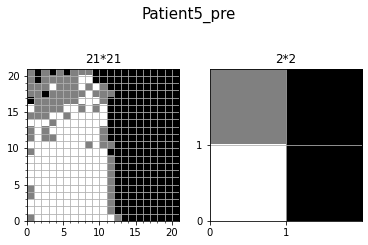

In [ ]:
label_441 = np.load('/content/drive/My Drive/Newdata/matrix_output_pre.npy') 

# label_25 = np.load('/content/drive/My Drive/Newdata/_441to4/To_25_pre.npy',allow_pickle=True)
# label_16 = np.load('/content/drive/My Drive/Newdata/_441to4/To_16_pre.npy',allow_pickle=True)
# label_9 = np.load('/content/drive/My Drive/Newdata/_441to4/To_9_pre.npy',allow_pickle=True)
label_4 = np.load('/content/drive/My Drive/Newdata/_441to4/To_4_pre.npy',allow_pickle=True)
# Label_25 = np.reshape(label_25,(24,5,5))
# Label_16 = np.reshape(label_16,(24,4,4))
# Label_9 = np.reshape(label_9,(24,3,3))
Label_4 = np.reshape(label_4,(24,2,2))

i = 4

fig = plt.figure()
fig.suptitle('Patient'+ str(i+1)+ '_pre', fontsize=15)

major_ticks = np.arange(0, 21, 5)
minor_ticks = np.arange(0, 21, 1)

plt.subplot(1,2,1)
plt.imshow(label_441[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
ax = plt.gca()
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
ax.grid(which='major')
plt.title('21*21')

# plt.subplot(2,3,2)
# plt.imshow(Label_25[i].astype(np.float), cmap='gray',extent=[0,5,0,5],vmin=0, vmax=2)
# plt.title('5*5')
# ax = plt.gca()
# ax.set_xticks(np.arange(0, 5, 1))
# ax.set_yticks(np.arange(0, 5, 1))
# plt.grid()

# plt.subplot(2,3,3)
# plt.imshow(Label_16[i].astype(np.float), cmap='gray',extent=[0,4,0,4],vmin=0, vmax=2)
# plt.title('4*4')
# ax = plt.gca()
# ax.set_xticks(np.arange(0, 4, 1))
# ax.set_yticks(np.arange(0, 4, 1))
# plt.grid()

# plt.subplot(2,3,4)
# plt.imshow(Label_9[i].astype(np.float), cmap='gray',extent=[0,3,0,3],vmin=0, vmax=2)
# plt.title('3*3',y=-0.4)
# ax = plt.gca()
# ax.set_xticks(np.arange(0, 3, 1))
# ax.set_yticks(np.arange(0, 3, 1))
# plt.grid()


plt.subplot(1,2,2)
plt.imshow(Label_4[i].astype(np.float), cmap='gray',extent=[0,2,0,2],vmin=0, vmax=2)
plt.title('2*2')
ax = plt.gca()
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
plt.grid()


fig.show()
fig.savefig('/content/drive/My Drive/images/4vs441.png', dpi = 800)

# 举几个例子的画

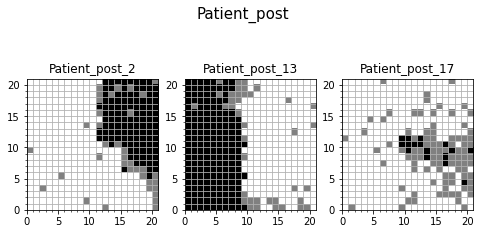

In [ ]:
tmp = 'post' 
# tmp = 'post' 
# tmp = 'pre' 
aaa  = np.load('/content/drive/My Drive/Newdata/matrix_output_'+ tmp+'.npy')

# print(aaa.shape)


fig = plt.figure()
fig.suptitle('Patient_'+tmp, fontsize=15)


major_ticks = np.arange(0, 21, 5)
minor_ticks = np.arange(0, 21, 1)

plt.subplot(1,3,1)
plt.imshow(aaa[1].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
plt.title('Patient_'+ tmp + '_2')
ax = plt.gca()
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
ax.grid(which='major')

plt.subplot(1,3,2)
plt.imshow(aaa[12].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
plt.title('Patient_'+ tmp + '_13')
ax = plt.gca()
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
ax.grid(which='major')


plt.subplot(1,3,3)
plt.imshow(aaa[16].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
plt.title('Patient_'+ tmp + '_17')
ax = plt.gca()
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
ax.grid(which='major')


fig = plt.gcf()
fig.set_size_inches((8, 4), forward=False)

# fig.show()
# %matplotlib inline
fig.savefig('/content/drive/My Drive/images/Patient_output_'+ tmp + '_example2.png',dpi = 1200)



# 五种合一 

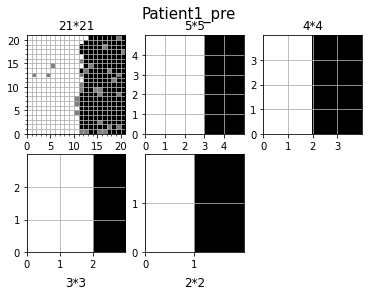

In [ ]:
label_441 = np.load('/content/drive/My Drive/Newdata/matrix_output_pre.npy') 

label_25 = np.load('/content/drive/My Drive/Newdata/_441to4/To_25_pre.npy',allow_pickle=True)
label_16 = np.load('/content/drive/My Drive/Newdata/_441to4/To_16_pre.npy',allow_pickle=True)
label_9 = np.load('/content/drive/My Drive/Newdata/_441to4/To_9_pre.npy',allow_pickle=True)
label_4 = np.load('/content/drive/My Drive/Newdata/_441to4/To_4_pre.npy',allow_pickle=True)
Label_25 = np.reshape(label_25,(24,5,5))
Label_16 = np.reshape(label_16,(24,4,4))
Label_9 = np.reshape(label_9,(24,3,3))
Label_4 = np.reshape(label_4,(24,2,2))

i = 0

fig = plt.figure()
fig.suptitle('Patient'+ str(i+1)+ '_pre', fontsize=15)

plt.subplot(2,3,1)
plt.imshow(label_441[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
ax = plt.gca()
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
ax.grid(which='major')
plt.title('21*21')

plt.subplot(2,3,2)
plt.imshow(Label_25[i].astype(np.float), cmap='gray',extent=[0,5,0,5],vmin=0, vmax=2)
plt.title('5*5')
ax = plt.gca()
ax.set_xticks(np.arange(0, 5, 1))
ax.set_yticks(np.arange(0, 5, 1))
plt.grid()

plt.subplot(2,3,3)
plt.imshow(Label_16[i].astype(np.float), cmap='gray',extent=[0,4,0,4],vmin=0, vmax=2)
plt.title('4*4')
ax = plt.gca()
ax.set_xticks(np.arange(0, 4, 1))
ax.set_yticks(np.arange(0, 4, 1))
plt.grid()

plt.subplot(2,3,4)
plt.imshow(Label_9[i].astype(np.float), cmap='gray',extent=[0,3,0,3],vmin=0, vmax=2)
plt.title('3*3',y=-0.4)
ax = plt.gca()
ax.set_xticks(np.arange(0, 3, 1))
ax.set_yticks(np.arange(0, 3, 1))
plt.grid()


plt.subplot(2,3,5)
plt.imshow(Label_4[i].astype(np.float), cmap='gray',extent=[0,2,0,2],vmin=0, vmax=2)
plt.title('2*2',y=-0.4)
ax = plt.gca()
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, 2, 1))
plt.grid()


fig.show()
fig.savefig('/content/drive/My Drive/images/tmp.png', dpi = 800)

In [ ]:
label_441 = np.load('/content/drive/My Drive/Newdata/matrix_output_pre.npy') 

label_25 = np.load('/content/drive/My Drive/Newdata/_441to4/To_25_pre.npy',allow_pickle=True)
label_16 = np.load('/content/drive/My Drive/Newdata/_441to4/To_16_pre.npy',allow_pickle=True)
label_9 = np.load('/content/drive/My Drive/Newdata/_441to4/To_9_pre.npy',allow_pickle=True)
label_4 = np.load('/content/drive/My Drive/Newdata/_441to4/To_4_pre.npy',allow_pickle=True)
Label_25 = np.reshape(label_25,(24,5,5))
Label_16 = np.reshape(label_16,(24,4,4))
Label_9 = np.reshape(label_9,(24,3,3))
Label_4 = np.reshape(label_4,(24,2,2))

for i in range(24):

  fig = plt.figure()
  fig.suptitle('Patient'+ str(i+1)+ '_pre', fontsize=15)

  plt.subplot(2,3,1)
  plt.imshow(label_441[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  plt.title('21*21')
  ax = plt.gca()
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='minor')
  ax.grid(which='major')
  plt.title('21*21')

  plt.subplot(2,3,2)
  plt.imshow(Label_25[i].astype(np.float), cmap='gray',extent=[0,5,0,5],vmin=0, vmax=2)
  plt.title('5*5')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 5, 1))
  ax.set_yticks(np.arange(0, 5, 1))
  plt.grid()

  plt.subplot(2,3,3)
  plt.imshow(Label_16[i].astype(np.float), cmap='gray',extent=[0,4,0,4],vmin=0, vmax=2)
  plt.title('4*4')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 4, 1))
  ax.set_yticks(np.arange(0, 4, 1))
  plt.grid()

  plt.subplot(2,3,4)
  plt.imshow(Label_9[i].astype(np.float), cmap='gray',extent=[0,3,0,3],vmin=0, vmax=2)
  plt.title('3*3',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 3, 1))
  ax.set_yticks(np.arange(0, 3, 1))
  plt.grid()


  plt.subplot(2,3,5)
  plt.imshow(Label_4[i].astype(np.float), cmap='gray',extent=[0,2,0,2],vmin=0, vmax=2)
  plt.title('2*2',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 2, 1))
  ax.set_yticks(np.arange(0, 2, 1))
  plt.grid()


  fig.show()
  fig.savefig('/content/drive/My Drive/images/几种不同label对比图/png/Patient_'+str(i+1)+ '_pre.png', dpi = 800)

In [ ]:
label_441 = np.load('/content/drive/My Drive/Newdata/matrix_output_post.npy') 

label_25 = np.load('/content/drive/My Drive/Newdata/_441to4/To_25_post.npy',allow_pickle=True)
label_16 = np.load('/content/drive/My Drive/Newdata/_441to4/To_16_post.npy',allow_pickle=True)
label_9 = np.load('/content/drive/My Drive/Newdata/_441to4/To_9_post.npy',allow_pickle=True)
label_4 = np.load('/content/drive/My Drive/Newdata/_441to4/To_4_post.npy',allow_pickle=True)
Label_25 = np.reshape(label_25,(24,5,5))
Label_16 = np.reshape(label_16,(24,4,4))
Label_9 = np.reshape(label_9,(24,3,3))
Label_4 = np.reshape(label_4,(24,2,2))

for i in range(24):

  fig = plt.figure()
  fig.suptitle('Patient'+ str(i+1)+ '_post', fontsize=15)

  plt.subplot(2,3,1)
  plt.imshow(label_441[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  plt.title('21*21')
  ax = plt.gca()
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='minor')
  ax.grid(which='major')
  plt.title('21*21')

  plt.subplot(2,3,2)
  plt.imshow(Label_25[i].astype(np.float), cmap='gray',extent=[0,5,0,5],vmin=0, vmax=2)
  plt.title('5*5')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 5, 1))
  ax.set_yticks(np.arange(0, 5, 1))
  plt.grid()

  plt.subplot(2,3,3)
  plt.imshow(Label_16[i].astype(np.float), cmap='gray',extent=[0,4,0,4],vmin=0, vmax=2)
  plt.title('4*4')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 4, 1))
  ax.set_yticks(np.arange(0, 4, 1))
  plt.grid()

  plt.subplot(2,3,4)
  plt.imshow(Label_9[i].astype(np.float), cmap='gray',extent=[0,3,0,3],vmin=0, vmax=2)
  plt.title('3*3',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 3, 1))
  ax.set_yticks(np.arange(0, 3, 1))
  plt.grid()


  plt.subplot(2,3,5)
  plt.imshow(Label_4[i].astype(np.float), cmap='gray',extent=[0,2,0,2],vmin=0, vmax=2)
  plt.title('2*2',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 2, 1))
  ax.set_yticks(np.arange(0, 2, 1))
  plt.grid()


  fig.show()
  fig.savefig('/content/drive/My Drive/images/几种不同label对比图/png/Patient_'+str(i+1)+ '_post.png', dpi = 800)

In [ ]:
label_441 = np.load('/content/drive/My Drive/Newdata/matrix_output_fu.npy') 

label_25 = np.load('/content/drive/My Drive/Newdata/_441to4/To_25_fu.npy',allow_pickle=True)
label_16 = np.load('/content/drive/My Drive/Newdata/_441to4/To_16_fu.npy',allow_pickle=True)
label_9 = np.load('/content/drive/My Drive/Newdata/_441to4/To_9_fu.npy',allow_pickle=True)
label_4 = np.load('/content/drive/My Drive/Newdata/_441to4/To_4_fu.npy',allow_pickle=True)
Label_25 = np.reshape(label_25,(24,5,5))
Label_16 = np.reshape(label_16,(24,4,4))
Label_9 = np.reshape(label_9,(24,3,3))
Label_4 = np.reshape(label_4,(24,2,2))

for i in range(24):

  fig = plt.figure()
  fig.suptitle('Patient'+ str(i+1)+ '_fu', fontsize=15)

  plt.subplot(2,3,1)
  plt.imshow(label_441[i].astype(np.float), cmap='gray',extent=[0,21,0,21],vmin=0, vmax=2)
  plt.title('21*21')
  ax = plt.gca()
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  ax.grid(which='minor')
  ax.grid(which='major')
  plt.title('21*21')



  plt.subplot(2,3,2)
  plt.imshow(Label_25[i].astype(np.float), cmap='gray',extent=[0,5,0,5],vmin=0, vmax=2)
  plt.title('5*5')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 5, 1))
  ax.set_yticks(np.arange(0, 5, 1))
  plt.grid()

  plt.subplot(2,3,3)
  plt.imshow(Label_16[i].astype(np.float), cmap='gray',extent=[0,4,0,4],vmin=0, vmax=2)
  plt.title('4*4')
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 4, 1))
  ax.set_yticks(np.arange(0, 4, 1))
  plt.grid()

  plt.subplot(2,3,4)
  plt.imshow(Label_9[i].astype(np.float), cmap='gray',extent=[0,3,0,3],vmin=0, vmax=2)
  plt.title('3*3',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 3, 1))
  ax.set_yticks(np.arange(0, 3, 1))
  plt.grid()


  plt.subplot(2,3,5)
  plt.imshow(Label_4[i].astype(np.float), cmap='gray',extent=[0,2,0,2],vmin=0, vmax=2)
  plt.title('2*2',y=-0.4)
  ax = plt.gca()
  ax.set_xticks(np.arange(0, 2, 1))
  ax.set_yticks(np.arange(0, 2, 1))
  plt.grid()


  fig.show()
  fig.savefig('/content/drive/My Drive/images/几种不同label对比图/png/Patient_'+str(i+1)+ '_fu.png', dpi = 800)

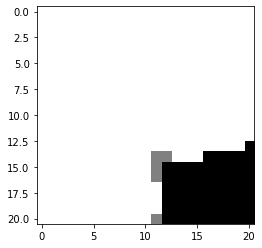

In [ ]:
Mm=label_441[2].astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray')

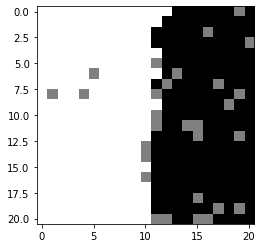

In [ ]:
Mm=label_441[0].astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray')

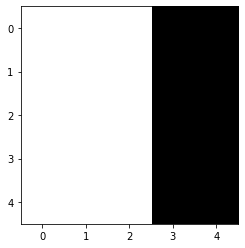

In [ ]:
Mm=Label_25[0].astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray')

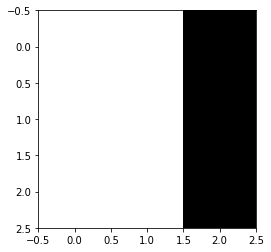

In [ ]:
Mm=Label_9[0].astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray')

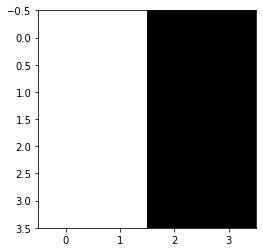

In [ ]:
Mm=Label_16[0].astype(np.float) # conver to float  and plot 
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray')

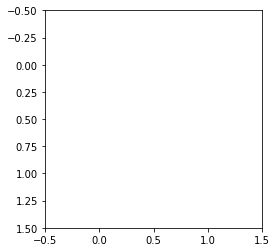

In [ ]:
# Label_4 = np.reshape(label_4,(24,2,2))
# Mm=Label_4[16].astype(np.float) # conver to float  and plot 
# print(Mm)
Mm = [[2., 2.],[2., 2.]]
# %matplotlib qt 
%matplotlib inline
plt.imshow(Mm, cmap='gray',vmin=0, vmax=2)